### Name: Omotoso Oluwapelumi
### Track: Data Science

**AXIA AFRICA PROJECT**  
**MILESTONE 1**   
In this project, estimation of the Aggregate rating of a restaurant will be carried out based on some features given and features that will be created.  
The process of carrying out this project will be done in steps  

* Week 1: Data Exploration  
* Week 2: Data Visualization
* Week 3: Customer Preferences & Additional Insights
* Week 4: Predictive Modeling



Week 1: Data Exploration  
  1. We will be exploring the dataset dimensions.
  2. Analyze the target variable (Aggregate rating)
  3. Calculate statistics for numerical columns.
  4. Explore categorical variables
  5. Identifying top 5 cuisines and cities based on some metrics  

The insights obtained from this week's milestone are all addressed at the end of the notebook

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## This will ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Import and view the dataset
url = 'https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv'
df = pd.read_csv(url)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
## Checking dataset dimension
df.shape

(9551, 21)

There are 9551 rows and 21 columns

The Restaurant ID column will be dropped as it does not contain add valuable information to our regression problem

In [5]:
df.drop('Restaurant ID', axis=1, inplace=True)

In [6]:
## Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [7]:
# sorting missing values by their sum
df.isna().sum().sort_values(ascending=False)

,0
Cuisines,9
Restaurant Name,0
City,0
Country Code,0
Address,0
Locality,0
Longitude,0
Locality Verbose,0
Latitude,0
Average Cost for two,0


There are 9 missing values in the Cuisines column

In [8]:
## Viewing the rows with the missing values to get a better understanding
df_missing = df.loc[df.isnull().any(axis=1)]
df_missing

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


Something to note: The rows with missing values all have the same country code (216)

### Target variable analysis

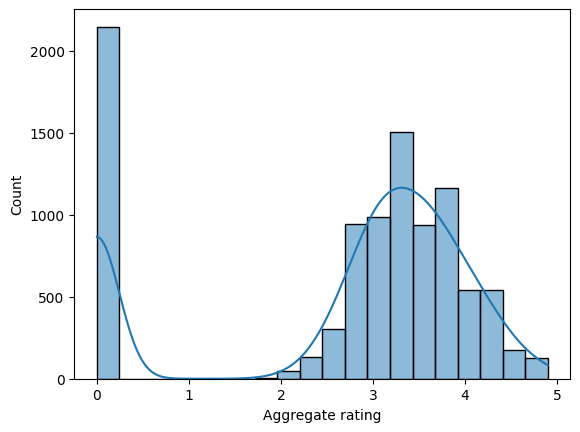

In [9]:
## Analyzing the target variable (Aggregate rating)
## Let's look at a visual of the column
sns.histplot(data=df,
             x='Aggregate rating',
            kde=True,
            bins=20);

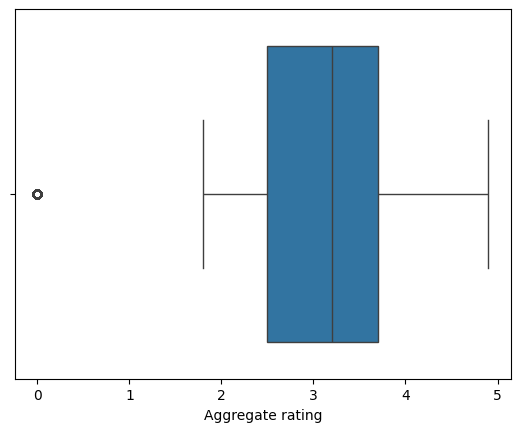

In [10]:
## Boxplot of the target column
sns.boxplot(data=df,
             x='Aggregate rating');

In [11]:
## Statistical information of the target variable
df['Aggregate rating'].describe().T

,Aggregate rating
count,9551.000000
mean,2.666370
std,1.516378
min,0.000000
25%,2.500000
50%,3.200000
75%,3.700000
max,4.900000


In [12]:
## Skewness of the target variable
round(df['Aggregate rating'].skew(), 2)

np.float64(-0.95)

Looking at the visuals and statistics above, the Aggregate rating column is slightly skewed to the right, with a skew value of 0.95 which is acceptable. For this reason, there will not be a need to transform the target column.

### Categorical and Numerical Columns

In [13]:
## Split the data into numerical and categorical columns
num_cols = df.select_dtypes(np.number).columns
cat_cols = df.select_dtypes('object').columns

num_cols, cat_cols

(Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
        'Price range', 'Aggregate rating', 'Votes'],
       dtype='object'),
 Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
        'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
        'Is delivering now', 'Switch to order menu', 'Rating color',
        'Rating text'],
       dtype='object'))

In [14]:
## We will be splitting the numerical columns into two categories again
## One will contain the geographical columns(longitude, latitude and country code) and the other will contain the rest

geo = ['Country Code', 'Longitude', 'Latitude']
numerical = num_cols.drop(['Country Code', 'Longitude', 'Latitude'])
geo, num_cols

(['Country Code', 'Longitude', 'Latitude'],
 Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
        'Price range', 'Aggregate rating', 'Votes'],
       dtype='object'))

### Categorical Columns

In [15]:
cat_cols

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [16]:
## The columns Restaurant Name, Address, Locality and Locality Verbose, Rating color and text do not give useful information
## Useful categorical columns will be selected
cat_col = ['Cuisines','City', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu']

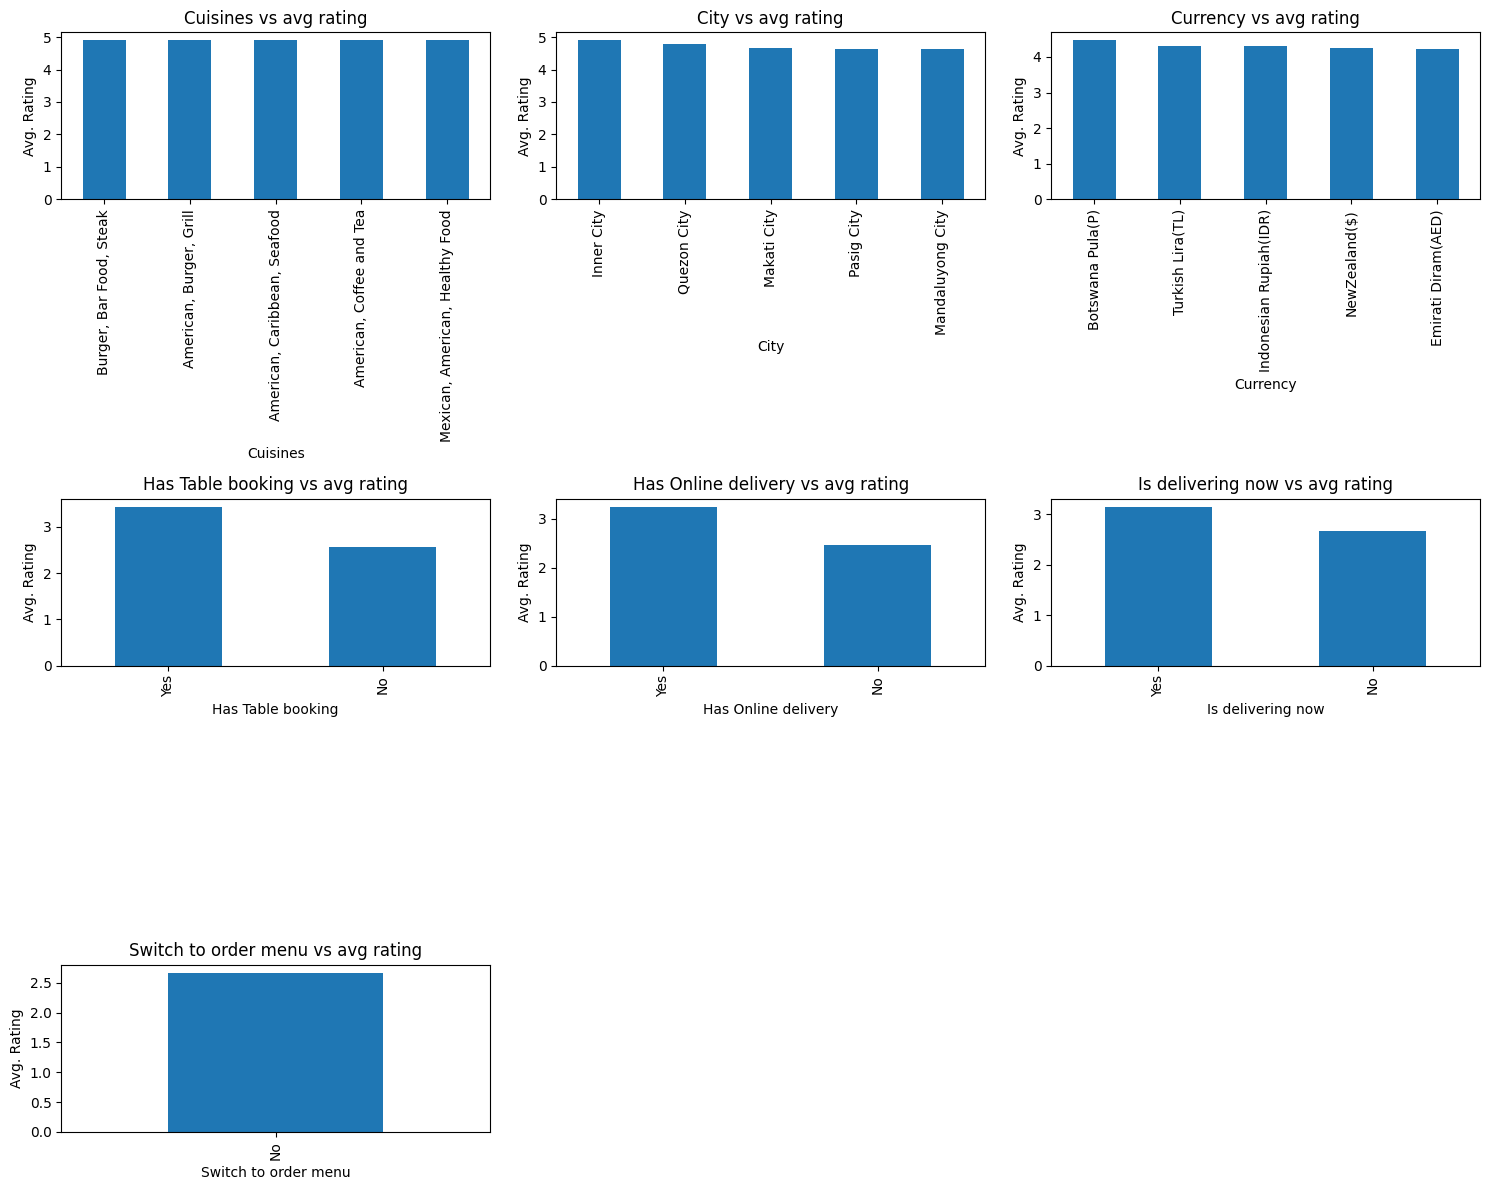

In [17]:
## Exploring the categorical data
## Performing Bivariate Analysis

# Setting the figure and dividing the plot into 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize = (15, 12))

## Spreads out each of the axis
axis = axes.flatten()

## Loop to iterate over each of the categorical columns
## enumerate() assigns each column with an index
for i, col in enumerate(cat_col):

    ## Assigns each index to an axis
    ax = axis[i]

    ## Groups each categorical data by the mean of the aggregate rating
    grouped_data = df.groupby(col)['Aggregate rating'].mean().sort_values(ascending=False).head(5)
    grouped_data.plot(kind='bar', ax=ax)
    ax.set_ylabel('Avg. Rating')
    ax.set_title(f'{col} vs avg rating')

## Since there are 13 columns, the below for loop deletes the remaining two figures created
for ax in range(len(cat_col), len(axis)):
    plt.delaxes(axis[ax])

plt.tight_layout()
plt.show()


### Numerical Columns Statistics

In [18]:
## Statistics for numerical columns

## Looking at the skewness
skewness = df[numerical].skew()
skewness

,0
Average Cost for two,35.477915
Price range,0.889618
Aggregate rating,-0.954130
Votes,8.807637


In [19]:
## More statistical Information of the numerical columns

df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Average Cost for two,9551.0,1199.210763,16121.183073,0.0,250.0,400.0,700.0,800000.0
Price range,9551.0,1.804837,0.905609,1.0,1.0,2.0,2.0,4.0
Aggregate rating,9551.0,2.666370,1.516378,0.0,2.5,3.2,3.7,4.9
Votes,9551.0,156.909748,430.169145,0.0,5.0,31.0,131.0,10934.0


### Looking at the Cuisines and Cities Columns

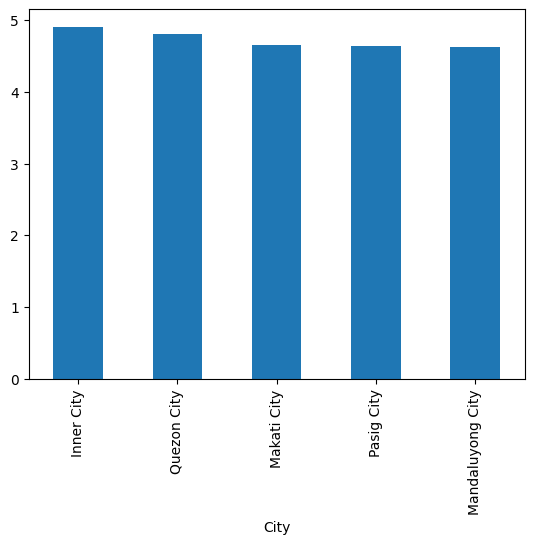

In [20]:
## Checking the top 5 cities by their average rating
grouped_city = round(df.groupby('City')['Aggregate rating'].mean(), 2)
sorted = grouped_city.sort_values(ascending=False).head(5)
sorted.plot(kind='bar');

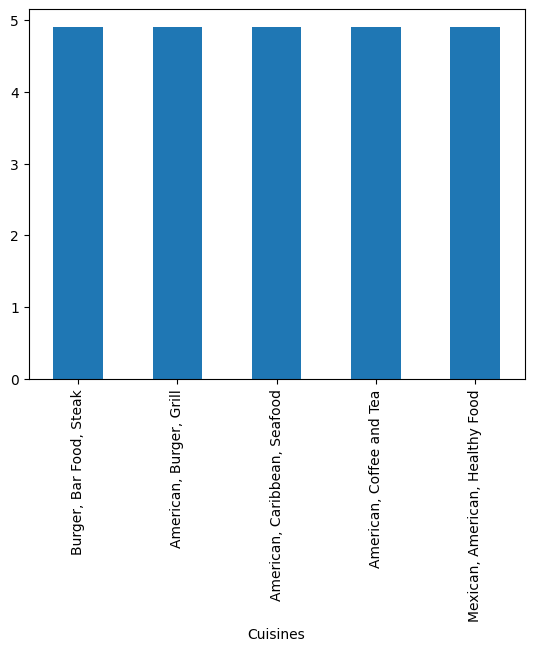

In [21]:
# Checking top 5 Cuisines by the sum of their vote count
grouped_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean()
grouped_cuisines.sort_values(ascending=False).head(5).plot(kind='bar');

### Insights Obtained from Week 1 Milestone (Data Exploration)

#### Dimension
* The data set contains 9551 rows (entries) and 21 columns (features)
* Since we will not be making use of the Restaurant ID feature, it was dropped

#### Missing values and Data Types
* There were 9 missing values, and they were found to be in the Cuisines feature.
* Upon further inspection, it was found out that all the missing values had the same country code (216).  
This will be important to note when dealing with the missing values.
* All the data types are correct with respect to the columns.

#### Target Variable Analysis
* The average aggregate rating is 2.7.
* Looking at the visuals(histogram and boxplot), a lot of restaurants had a rating of 0.
* The data is slightly skewed to the right with a skew value of approximately 0.95.

#### Numerical Variables
* The numerical columns were divided into two:
1. Geo (containing geographical information:longitude, latitude and country code)
2. Numerical (containing the other numerical columns)

#### Numerical columns analysis
###### Price Range
* Skew value: 0.89
* Mean value: 1.80
* Standard deviation: 0.905
* Minimum value: 1.0
* Maximum value: 4.0

###### Average cost for two:
* Skew value: 35.5.
* Mean value: 1119
* Standard deviation: 16121.2
* Minimum value: 0.0
* Maximum value: 80000

###### Aggregate rating:
* Skew value: -0.94
* Mean value: 2.67
* Standard deviation: 1.52
* Minimum value:0.0
* Maximum value: 4.9

###### Votes:
* Skew value: 8.81
* Mean value: 156.91
* Standard deviation: 430.17
* Minimum value:0.0
* Maximum value: 10934

#### Categorical column analysis:
Performing a bivariate analysis with the average value of the aggregate rating, the following were discovered:
* Batswana restaurants have the highest average aggregate rating, as seen in thr average rating of their currency.
* Restaurants with table booking, have higher average aggregate ratings.
* Restaurants with online delivery have higher aggregate ratings
* Restaurants that run a deliver now service tend to have a higher average aggregate rating.

#### Cuisines and Cities
* From the Cities column grouped by the average aggregate rating, the city with the highest average rating is Inner City with a rating of 4.9.
* From the Cuisines grouped by the average Aggregate rating, the Burger, bar food and steak cuisine had the highest average rating.  


## Week 2 Milestone: Data Visualization
Objectives for week 2:  
* Create histograms, bar plots, and boxplots of ratings.   
Compare average ratings across cuisines and cities
* Geospatial Analysis: Map restaurantlocations using coordinates.  
Analyze distributionacross cities.Correlate locationwith ratings.
* Additional Analysis: Identify outliers and their effects.  
Determine relationship between votes and ratings.

Recap of the insights from week 2 will be shown below.

### Histograms, Bar plots and Box plots of ratings

In [22]:
## For this section, a different visualization tool, plotly.express will be used
import plotly.express as px

In [23]:
## Creating a histogram of the aggregate ratings
fig = px.histogram(data_frame=df,
                   x='Aggregate rating',
                   nbins=20,
                   title='Distribution of Aggregate rating',
                   text_auto=True)
fig.show()

In [24]:
## Creating a boxplot
plt.figure(figsize=(10, 10))
fig = px.box(df, y='Aggregate rating', points='outliers')
fig.show()

<Figure size 1000x1000 with 0 Axes>

Using the groupby functions created above, bar plots will be plotted to show the average ratings of cuisines and cities.  
To improve readability, only the top 5 average Aggregate rating of each category(Cuisines and Cities) will be shown

In [25]:
## Bar plots of ratings of Cities
fig = px.histogram(data_frame=sorted.reset_index(),
                   x='City',
                   y='Aggregate rating',
                   histfunc='avg')
fig.show()

In [26]:
# Checking top 5 Cuisines by their average aggregate rating
grouped_cuisines.sort_values(ascending=False)

px.histogram(data_frame=grouped_cuisines.sort_values(ascending=False).head(5).reset_index(),
             x='Cuisines',
             y='Aggregate rating',
             histfunc='avg')

### Geospatial Analysis

In [27]:
## Creating a geographical plot

fig = px.scatter_map(data_frame=df,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Restaurant Name',
                     color='Aggregate rating',
                     opacity=0.5,
                     size='Aggregate rating',
                     size_max=10,
                     map_style='carto-voyager',
                     color_continuous_scale='purples'
                     )
fig.show()

* From the geospatial analysis, we can infer that a lot of restaurants were rated in India and United States of America cities.
* The performance of the Indian restaurants appear to be well above average.
* Majority of the rated African restaurants are found in the south.

In [28]:
## Correlation between Aggregate rating and Location
ge_o=['Aggregate rating', 'Longitude', 'Latitude']
cm_2 = df[ge_o].corr()
fig = px.imshow(cm_2,
                text_auto='.2f',
                color_continuous_scale='purples')
fig.show()

### Additional Analysis
In this section, we will be looking at the earlier separated numeric columns  
To do this, we will be making use of make_subplots library from the plotly.subplots module

In [29]:
## Tool to create subplot
from plotly.subplots import make_subplots

In [30]:
## Viewing the columns to be worked with
numerical

Index(['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], dtype='object')

In [31]:
## Create a for loop that iterates over each column
for col in numerical:

  ## Creating the subplots
  fig = make_subplots(2, 2,
                      subplot_titles=(f'{col} Distribution', f'{col} Boxplot'))

  ## Setting the layout of the plots
  fig.update_layout(height=800, width=1200)

  ## Implementing the histogram visual to be plotted on the first column
  fig.add_histogram(x=df[col], row=1,
                    col=1, nbinsx=20,
                    hovertemplate = "x: %{x} <br> y: %{y} <extra></extra>")

  ## Implementing the boxplot visual to be plotted on the second column
  fig.add_box(y=df[col], row=1,
              col=2, hovertemplate = "x: %{x} <br> y: %{y} <extra></extra>")

  ## Updating the titles of the x and y axes of each plot
  fig.update_xaxes(title_text = col, row=1, col=1)
  fig.update_xaxes(title_text = col, row=1, col=2)
  fig.update_yaxes(title_text = 'Count', row=1, col=1)
  fig.update_yaxes(title_text = 'Count', row=1, col=2)
  fig.show()


### Outliers
* In the average cost for two visuals, there are a lot of outliers as shown in the boxplot. This however is not a very reliable information as there are different currencies, meaning the values will vary greatly.
* In the price range visual, there is an outlier which occurs when the price range is equal to 4.
* In the aggregate rating visuals, an outlier occurs where the aggregate rating is equal to zero.
* In the Votes visuals, there are appear to be a lot of outliers.

They will be dealt with accordingly as the presence of outliers can sometimes disturb the machine learning's ability to predict accurately.

### Relationship between Votes and Ratings
Plots that will be used:
* Scatter plot
* Heatmap

In [32]:
## To show relationship between votes and ratings, a scatterplot will be used as well as a heatmap

## Scatter plot
fig = px.scatter(data_frame=df,
                 x='Votes',
                 y='Aggregate rating',
                 opacity=0.5)
fig.show()

In [33]:
## Creating a list with only the Votes and Aggregate rating columns
v_r = ['Votes', 'Aggregate rating']

In [34]:
## Heatmap to visualize correlation between Votes and Aggregate rating
cm = df[v_r].corr()
fig = px.imshow(cm,
                text_auto='.2f',
                color_continuous_scale='purples')
fig.show()

As  shown from the visuals above, we can infer that:
* There is very little correlation between the number of votes and the aggregate rating of each restaurant.

### Recap of week 2 milestone
Using the plotly module, the following information were obtained
#### Plots of Aggregate Ratings
*  2148 restaurants have a rating between 0-0.2
*  The city, Inner City, has the highest average Aggregate rating.
*  Italian, Deli Cuisine performed better than all the other cuisines.

#### Geospatial Analysis
* Rated Restaurants are present in India, and North America (United States of America).
* Indian restaurants appear better rated as compared to other restaurants
* Majority of the African rated restaurants are found in the South of Africa.
* There is little to no correlation between Aggregate rating and Location.

#### Additional Analysis
* In the Average cost for two distribution column, there are a lot of outliers as shown in the boxplot. This however is not a very reliable information as there are different currencies, meaning the values will vary greatly.
* In the Price range visual, there is an outlier which occurs when the price range is equal to 4.
* In the Aggregate rating visuals, an outlier occurs where the aggregate rating is equal to zero(0).
* In the Votes visuals, there appear to be a lot of outliers.
* There is not much of a correlation between Votes and Aggregate rating

### Week 3 Milestone: Customer Preferences
This week, we will be looking at the following:
1. Cuisine Analysis:
* Analyze relationships between cuisines and ratings.
* Identify popular cuisines by votes.
2. Price Range:
* Determine which price ranges receive highest ratings.
3. Service Features:
* Analyze table booking and delivery


#### Cuisine Analysis

In [35]:
## Identifying highest rated cuisines
top_rated_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
top_rated_cuisines.sort_values(by='Aggregate rating', ascending=False).head(5)

,Cuisines,Aggregate rating
302,"Burger, Bar Food, Steak",4.9
33,"American, Burger, Grill",4.9
37,"American, Caribbean, Seafood",4.9
41,"American, Coffee and Tea",4.9
1214,"Mexican, American, Healthy Food",4.9


The Burger, Bar Food, Steak	cuisine performed better than the rest with a rating of 4.9

In [36]:
## Visualizing cuisines against their average aggregate ratings
fig = px.bar(data_frame=top_rated_cuisines.sort_values(by='Aggregate rating', ascending=False).head(5),
             x="Cuisines",
             y="Aggregate rating"
             )
fig.show()

In [37]:
## Popular Cuisines by votes

cuisine_per_vote = df.groupby('Cuisines')['Votes'].sum().reset_index()
sorted_vote = cuisine_per_vote.sort_values(ascending=False, by='Votes').head(5)
sorted_vote

,Cuisines,Votes
1514,"North Indian, Mughlai",53747
1306,North Indian,46241
1329,"North Indian, Chinese",42012
331,Cafe,30657
497,Chinese,21925


The North Indian, Mughlai cuisine had the highest number of votes with a total vote count of 53,747 votes.

In [38]:
## Plotting Cuisines with the highest number of votes
fig = px.bar(data_frame=sorted_vote,
             x='Cuisines',
             y='Votes')
fig.show()

In [39]:
## Group by City and Cuisines, showing average aggregate rating
city_cuisine_ratings = df.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index()

## Top-rated cuisine per city
top_cuisine_per_city = city_cuisine_ratings.loc[city_cuisine_ratings.groupby('City')['Aggregate rating'].idxmax()]
top_cuisine_per_city.sort_values(by = 'Aggregate rating', ascending=False).head(10)

,City,Cuisines,Aggregate rating
8,Abu Dhabi,"Indian, North Indian",4.9
18,Agra,"Cafe, North Indian, Chinese",4.9
141,Auckland,Desserts,4.9
111,Ankara,World Cuisine,4.9
152,Augusta,"American, Caribbean, Seafood",4.9
409,Colombo,Seafood,4.9
454,Davenport,Asian,4.9
438,Dalton,"BBQ, Breakfast, Southern",4.9
474,Dehradun,North Indian,4.9
521,Dubai,"Continental, Indian",4.9


#### Price Range

In [40]:
## Price Range
## Comparing ratings across price points

range_rating = round(df.groupby('Price range')['Aggregate rating'].mean().reset_index(), 2)
range_rating.sort_values(by = 'Aggregate rating', ascending=False)

,Price range,Aggregate rating
3,4,3.82
2,3,3.68
1,2,2.94
0,1,2.00


Restaurants with a price range of 4 performed better than the rest with an aggregate rating of 3.82.

In [41]:
## Visualizing Price range against average Aggregate rating
fig = px.bar(data_frame=range_rating.sort_values(by = 'Aggregate rating', ascending=False),
             x='Price range',
             y='Aggregate rating',
             range_y=[0, 5])

fig.show()

#### Service Features

##### Table Booking

In [42]:
## Looking at the distribution of the Has Table booking column value counts
df['Has Table booking'].value_counts()

,count
Has Table booking,
No,8393
Yes,1158


In [43]:
## Grouping Cities and Table Booking feature by their average Aggregate rating
grouped_df = round(df.groupby(['City', 'Has Table booking'])['Aggregate rating'].mean().reset_index(), 2)

# Filtering rows where 'Has Table Booking' == 'Yes'
has_tab_book = grouped_df.loc[grouped_df['Has Table booking'] == 'Yes'].sort_values(by = 'Aggregate rating', ascending=False).head(10)
has_tab_book

,City,Has Table booking,Aggregate rating
44,Doha,Yes,4.70
88,Makati City,Yes,4.65
92,Mandaluyong City,Yes,4.60
82,London,Yes,4.53
147,Taguig City,Yes,4.53
116,Pasig City,Yes,4.50
139,Secunderabad,Yes,4.50
145,Tagaytay City,Yes,4.50
46,Dubai,Yes,4.49
1,Abu Dhabi,Yes,4.45


In [44]:
## Aggregate ratings of cities without table booking
no_tab_book = grouped_df.loc[grouped_df['Has Table booking'] == 'No'].sort_values(by = 'Aggregate rating', ascending=False).head(10)
no_tab_book

,City,Has Table booking,Aggregate rating
68,Inner City,No,4.90
115,Pasig City,No,4.90
129,Quezon City,No,4.80
91,Mandaluyong City,No,4.65
17,Beechworth,No,4.60
81,London,No,4.54
65,Hyderabad,No,4.53
80,Lincoln,No,4.50
146,Taguig City,No,4.50
111,Orlando,No,4.47


Looking at the dataframes that were created from the grouped dataframes with and without table booking, it can be infered that restaurants in cities without table bookings perform better than those with table bookings.  
This will be shown below

In [45]:
## Average Aggregate rating of Cities with Table Booking and no table booking
booking = {'Table Booking':has_tab_book.mean(numeric_only=True),
           'No Booking':no_tab_book.mean(numeric_only=True)}

In [46]:
## Showing average rating of restaurants with and without table booking
agg_rating = pd.DataFrame(booking)
agg_rating

,Table Booking,No Booking
Aggregate rating,4.545,4.639


##### Online Delivery Analysis

In [47]:
## Percentage of Restaurants with Online Delivery
yes_dlv = df[df['Has Online delivery']=='Yes']
round((len(yes_dlv)/len(df)) * 100, 2)

25.66

25.66% of restaurants have an Online delivery service

In [48]:
## Analyzing availability of online delivery across the Price ranges
fig = px.histogram(data_frame=df,
                   x='Price range',
                   color='Has Online delivery',
                   range_x=[0, 4])
fig.update_xaxes(range=[0, 4], autorange=True)
fig.show()

The blue section of the Histogram represents restaurants without the Online Delivery service.  
 The red section represents restaursants with it.

### Insights from Week 3 Milestone
#### Cuisine Analysis
* The highest rated cuisine is the Burger, Bar Food, Steak Cuisine with an averge aggregate rating of 4.9.
* The North Indian, Mughali cuisine had the highest number of votes with a total vote count of 53,747 votes.
* From the top rated cuisine by cities, we can infer that the most enjoyed cuisine in the city of Abu Dhabi is the Indian, North Indian cuisine.

#### Price Range
* Restaurants with a price range of 4 performed better than the rest with an average rating of 3.82.

#### Service Features
##### Table Booking
* There are more restaurants without table booking feature than those with table booking (8393 to 1158).
* Restaurants in cities without table booking perform better than restaurants that offer the service, with an average aggregate rating of 4.639 against 4.545
* The city of Doha had the highest rating for restaurants that have the table booking feature with a rating of 4.75.
* For Cities without the feature, restaurants in Inner City performed better than the rest.

##### Online Delivery
* 25.66% of the restaurants observed have an online meal delivery system.
* Looking at the availability of delivery for different price ranges, restaurants with a price range of 2 have the highest number of restaurants that offer an online delivery service.


### Week 4: Predictive Modeling
The following tasks will be carried out:
1. Feature Engineering:
* Extract additional features from existing columns. Create new features by encoding categorical variables.
2. Model Building:  
* Build regression models to predict restaurant ratings. Split data into training and testing sets.

3. Model Evaluation:  
* Evaluate using RMSE, MAE, and R-squared. Compare different algorithms like linear regression and random forest

#### Feature Engineering
In this section the following will be looked at:  
1. The following columns will be dropped as they are not of much use to a regression model and would only increase memory usage:
* Restaurant Name
* Country Code (We already have longitude and latitude features)
* City
* Address
* Locality
* Locality Verbose
* Rating color
* Rating text
* Currency
2. From the cuisine column, for entries with more than one cuisine, we will be
separating them into primary and secondary cuisine using the comma(,) separator.
3. Dropping missing values

#### Feature Selection

In [49]:
## Dropping columns not needed
df.drop(columns=['Restaurant Name','Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Rating color', 'Rating text', 'Currency'], inplace=True)

In [50]:
## Extracting additional features from existing columns
## Cuisine column

df['Primary cuisine'] = df['Cuisines'].str.split(',').str[0]

df

,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Primary cuisine
0,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,314,French
1,121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,591,Japanese
2,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,270,Seafood
3,121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,No,4,4.9,365,Japanese
4,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,229,Japanese
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,Turkish,80,No,No,No,No,3,4.1,788,Turkish
9547,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,No,3,4.2,1034,World Cuisine
9548,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,No,4,3.7,661,Italian
9549,29.036019,41.057979,Restaurant Cafe,120,No,No,No,No,4,4.0,901,Restaurant Cafe


As stated earlier (Week 1 Milestone), there were only 9 missing values.  
This is way less than 5% of the data. For that reason, the empty values will be dropped

In [51]:
## Dropping missing values
df.dropna(inplace=True)

Since we have extracted only the primary cuisine from the Cuisines column, the Cuisines column will be dropped.

In [52]:
## Dropping the cuisines column
df.drop('Cuisines', axis=1, inplace=True)

##### Data Preprocessing

In [53]:
## Obtaining categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Primary cuisine'],
      dtype='object')

In [54]:
## Obtaining numerical columns and dropping the target variable
num_cols = df.select_dtypes(exclude='object').columns

numerical = num_cols.drop('Aggregate rating')
numerical

Index(['Longitude', 'Latitude', 'Average Cost for two', 'Price range',
       'Votes'],
      dtype='object')

In [55]:
## OneHot Encoding Categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype='int')
df

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Primary cuisine_African,...,Primary cuisine_Tapas,Primary cuisine_Tea,Primary cuisine_Tex-Mex,Primary cuisine_Thai,Primary cuisine_Tibetan,Primary cuisine_Turkish,Primary cuisine_Turkish Pizza,Primary cuisine_Vietnamese,Primary cuisine_Western,Primary cuisine_World Cuisine
0,121.027535,14.565443,1100,3,4.8,314,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,121.014101,14.553708,1200,3,4.5,591,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,121.056831,14.581404,4000,4,4.4,270,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,121.056475,14.585318,1500,4,4.9,365,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121.057508,14.584450,1500,4,4.8,229,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,80,3,4.1,788,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9547,29.041297,41.009847,105,3,4.2,1034,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9548,29.034640,41.055817,170,4,3.7,661,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9549,29.036019,41.057979,120,4,4.0,901,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
## Performing standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Primary cuisine_African,...,Primary cuisine_Tapas,Primary cuisine_Tea,Primary cuisine_Tex-Mex,Primary cuisine_Thai,Primary cuisine_Tibetan,Primary cuisine_Turkish,Primary cuisine_Turkish Pizza,Primary cuisine_Vietnamese,Primary cuisine_Western,Primary cuisine_World Cuisine
0,1.377641,-1.024849,-0.006221,1.319726,4.8,0.365493,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.377315,-1.025915,-0.000020,1.319726,4.5,1.009408,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.378352,-1.023399,0.173592,2.424069,4.4,0.263210,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.378344,-1.023043,0.018581,2.424069,4.9,0.484048,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.378369,-1.023122,0.018581,2.424069,4.8,0.167901,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,-0.856833,1.378286,-0.069465,1.319726,4.1,1.467355,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9547,-0.855281,1.377110,-0.067915,1.319726,4.2,2.039208,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9548,-0.855443,1.381285,-0.063885,2.424069,3.7,1.172130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9549,-0.855410,1.381482,-0.066985,2.424069,4.0,1.730035,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
## Splitting data into train and test sets
## First we split the dataset into features and targets (X and y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [58]:
## Module used to split the dataset into training and test sets
from sklearn.model_selection import train_test_split

In [59]:
## Splitting the X, and y sets into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Building

In [60]:
## Importing Machine learning models to be used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [61]:
## Mapping model names with model instances
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

##### Model Evaluation

In [62]:
## Creating a pipeline using a for loop to iterate over each model
from sklearn.pipeline import Pipeline

## Metrics to be used to measure performance
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

for name, model in models.items():
  Pipe = Pipeline(steps=[
      ('model', model)
  ])

  ## Fitting the pipeline with the training data
  Pipe.fit(train_X, train_y)

  ## Predicting values using the test_X set
  test_pred = Pipe.predict(test_X)

  ## Using the different metrics to meaasure the
  test_r2 = r2_score(test_pred, test_y)
  test_rmse = root_mean_squared_error(test_pred, test_y)
  test_mae = mean_absolute_error(test_pred, test_y)

  ## Showing the performance of each model used
  print(f'Model Name: {name}\nr2_score: {test_r2}\nMAE: {test_mae}\nRMSE: {test_rmse} ')
  print('---'* 20)

Model Name: Linear Regression
r2_score: -1.172834020645563
MAE: 1.018034695827748
RMSE: 1.2448081141825336 
------------------------------------------------------------
Model Name: Decision Tree
r2_score: 0.9231871556484461
MAE: 0.26458878994237817
RMSE: 0.41982684948868826 
------------------------------------------------------------
Model Name: Random Forest
r2_score: 0.9593863719775357
MAE: 0.19540745715782382
RMSE: 0.2990469560524061 
------------------------------------------------------------


The Random Forest Regressor model performed better than the other two models as evidenced by the low Mean Average Error and Root Mean Square Error values and high R2 score (~0.96)

In [63]:
## Using the Random Forest library
model = RandomForestRegressor()

In [64]:
## Fit the model with training and test sets
model.fit(train_X, train_y)

RandomForestRegressor()

In [66]:
## Saving the model using Pickle

import pickle
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(model, 'rfr.pkl')

['rfr.pkl']

#### Week 4 Results
1. Feature Engineering
* From the Cuisines column, the first Cuisine before the comma was extracted and named the primary cuisine of each restaurant.
* This was carried out because when we are performing the encoding process of categorical columns, there will not be a lot of enties encoded.
2. Model Building
* In the process of modeling, the StandardScaler library was used to scale the numerical columns (Features)
* The data was then split into features and targets (X and y)
* The X and y data sets were further divided into training and test sets.  
The test set was set at 20 percent of the total entries, with a random seed of 42.
* Regression models used were: Linear Regression, Decision Tree Regressor, and the Random Forest Regressor.  
A pipeline was then created using a for loop to iterate over each of the regression models mentioned.
3. Model Evaluation
* Using the test set to predict values, we measured the performance of the predicted values on the test using metrics, R2-score, Mean Average Error, and Root Mean Square Error.
The reults are as follows
##### Linear Regression:
* R2 score: -1.17
* Mean Average Error: 1.02
* Root Mean Square Error: 1.24  

##### Decision Tree Regressor:
* R2 score: 0.92
* Mean Average Error: 0.266
* Root Mean Square Error: 0.418

##### Random Forest Regressor:
* R2 score: 0.96
* Mean Average Error: 0.194
* Root Mean Square Error: 0.297  
Therefore, for this particular regression problem, the model that will most likely give the best performance is the Random Forest Regressor